# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 500_Cities__Current_lack_of_health_insurance_among_adults_aged_18-64_years.csv to 500_Cities__Current_lack_of_health_insurance_among_adults_aged_18-64_years.csv
User uploaded file "500_Cities__Current_lack_of_health_insurance_among_adults_aged_18-64_years.csv" with length 7995613 bytes


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('500_Cities__Current_lack_of_health_insurance_among_adults_aged_18-64_years.csv')

In [3]:
df.shape

(28973, 24)

In [5]:
df.describe

<bound method NDFrame.describe of        Year StateAbbr      StateDesc     CityName GeographicLevel DataSource  \
0      2017        US  United States          NaN              US      BRFSS   
1      2017        FL        Florida   Palm Coast            City      BRFSS   
2      2017        CA     California    Vacaville            City      BRFSS   
3      2017        IL       Illinois  Bolingbrook            City      BRFSS   
4      2017        MN      Minnesota       Duluth            City      BRFSS   
...     ...       ...            ...          ...             ...        ...   
28968  2017        WY        Wyoming     Cheyenne    Census Tract      BRFSS   
28969  2017        WI      Wisconsin      Madison    Census Tract      BRFSS   
28970  2017        WA     Washington       Tacoma    Census Tract      BRFSS   
28971  2017        WA     Washington       Tacoma    Census Tract      BRFSS   
28972  2017        WI      Wisconsin    Milwaukee    Census Tract      BRFSS   

     

In [16]:
drop_cols = ['Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'StateDesc','DataSource' ,'GeoLocation',
             'Data_Value_Unit', 'Short_Question_Text', 'DataValueTypeID']

In [18]:
df = df.drop(columns=drop_cols)

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [20]:
print(df.nunique())
print("Column with most distinct values: CategoryID")

Year                         1
StateAbbr                   52
CityName                   474
GeographicLevel              3
Category                     1
UniqueID                 28472
Measure                      1
Data_Value_Type              2
Data_Value                 519
Low_Confidence_Limit       463
High_Confidence_Limit      563
PopulationCount           8050
CategoryID                   1
MeasureId                    1
CityFIPS                   500
TractFIPS                27618
dtype: int64
Column with most distinct values: CategoryID


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [21]:
redundant_cols = df.columns[df.nunique() == 1]
print(f"Redundant Columns (Single Unique Value): {redundant_cols}")

Redundant Columns (Single Unique Value): Index(['Year', 'Category', 'Measure', 'CategoryID', 'MeasureId'], dtype='object')


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

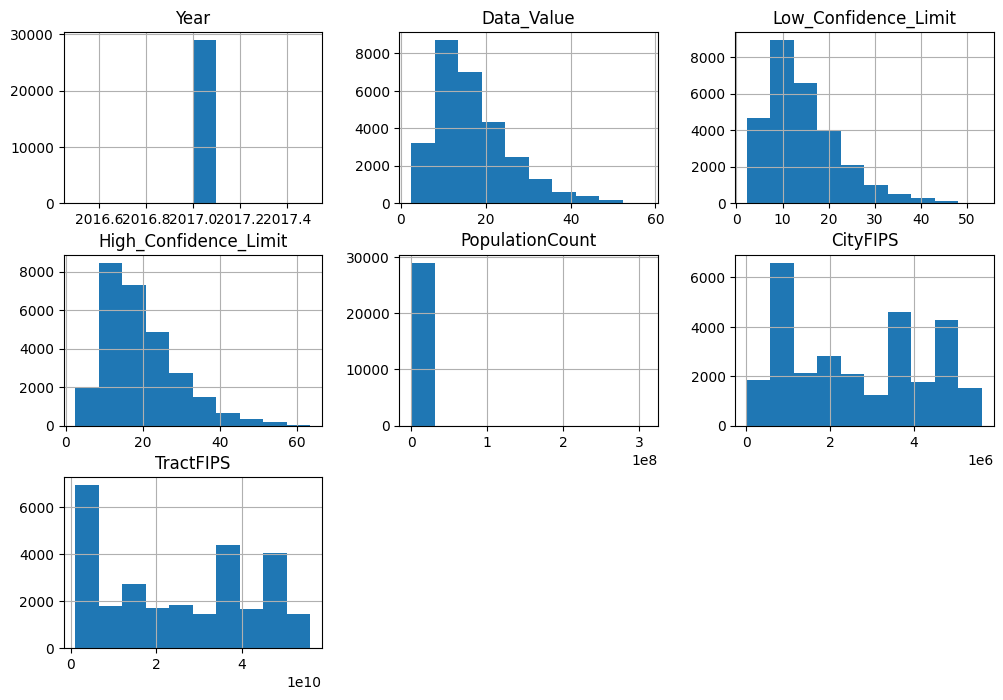

In [29]:
numeric_cols = df.select_dtypes(include=['int', 'float'])
numeric_cols.hist(figsize=(12,8))
plt.show()

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

In [30]:
# Look at overview of uninsured rate by StateAbbr
print(df.groupby('StateAbbr')['Data_Value'].mean().sort_values(ascending=False))

StateAbbr
TX    27.497316
FL    23.794048
NJ    23.399689
MS    22.124051
GA    21.989700
TN    19.570746
DE    19.269231
KS    18.170000
NV    17.960434
AL    17.935574
NC    17.723106
OK    17.718182
MO    16.987133
CT    16.751695
UT    16.735458
IL    16.689402
AZ    16.586719
WY    16.294444
SC    16.094350
NY    15.797661
ID    15.564384
NE    15.305505
IN    15.246269
LA    15.184514
US    14.950000
VA    14.889635
CA    14.714635
MI    14.252910
OH    13.941716
NM    13.872430
WI    13.812560
AR    13.806250
CO    13.615730
PA    13.319380
MD    13.094527
ME    12.931818
AK    12.792982
NH    12.456863
RI    12.410377
MN    12.283025
OR    12.181534
SD    11.550000
MT    11.461702
IA    11.415842
MA    11.237059
WV    10.795833
WA    10.780038
ND    10.244444
VT     9.738462
KY     9.559398
HI     9.027542
DC     8.754444
Name: Data_Value, dtype: float64


**Calculated average uninsured rate by state:**
Grouped the dataframe by 'StateAbbr.
Took the mean of the 'Data_Value' column to get average uninsured rate for each state.
Sorted by uninsured rate descending to see states with highest rates at the top

In [31]:
# Identify States/Cities with highest uninsured rates
high_uninsured_rates = df[df['Data_Value'] > 20][['StateAbbr','CityName','Data_Value']]
print(high_uninsured_rates)


      StateAbbr   CityName  Data_Value
19           TX     Austin        24.2
20           TX   Beaumont        21.5
21           TX     Dallas        44.2
22           TX     Dallas        39.6
23           TX    El Paso        24.4
...         ...        ...         ...
28921        WI     Racine        26.2
28926        WY   Cheyenne        23.9
28935        WI     Racine        27.6
28962        WY   Cheyenne        23.0
28972        WI  Milwaukee        22.6

[8298 rows x 3 columns]


**Identified states and cities with uninsured rates above 20%:**
Filtered the dataframe to only include rows where 'Data_Value' (uninsured rate) is greater than 20%.
Selected relevant columns to show state, city, and uninsured rate

In [33]:
# Analyze uninsured rates by Census Tract within Cities
chi_tracts = df[(df['StateAbbr']=='IL') & (df['CityName']=='Chicago')]
print(chi_tracts[['StateAbbr','CityName','Data_Value']].sort_values('Data_Value', ascending=False))

      StateAbbr CityName  Data_Value
10753        IL  Chicago        43.3
11451        IL  Chicago        41.5
10888        IL  Chicago        41.4
11030        IL  Chicago        41.3
11417        IL  Chicago        40.5
...         ...      ...         ...
10985        IL  Chicago         5.8
10812        IL  Chicago         5.6
11019        IL  Chicago         NaN
11296        IL  Chicago         NaN
11356        IL  Chicago         NaN

[799 rows x 3 columns]


**Analyzed uninsured rates by census tract within Chicago:**
Filtered to only Chicago rows.
Sorted by uninsured rate descending to see census tracts with highest rates at the top

In [34]:
# Identify highest population cities + uninsured rates
pop_df = df[['CityName','Data_Value','PopulationCount']]
print(pop_df.nlargest(10,'PopulationCount'))


          CityName  Data_Value  PopulationCount
0              NaN        15.2        308745538
176            NaN        14.7        308745538
17626     New York        16.1          8175133
18714     New York        16.1          8175133
4027   Los Angeles        17.4          3792621
4238   Los Angeles        17.6          3792621
11323      Chicago        17.6          2695598
11334      Chicago        17.8          2695598
25729      Houston        30.2          2099451
25867      Houston        30.5          2099451


**Identifed highest population cities and their uninsured rates:**
Created new dataframe with relevant columns and
used nlargest() to select the 10 rows with the largest 'PopulationCount'

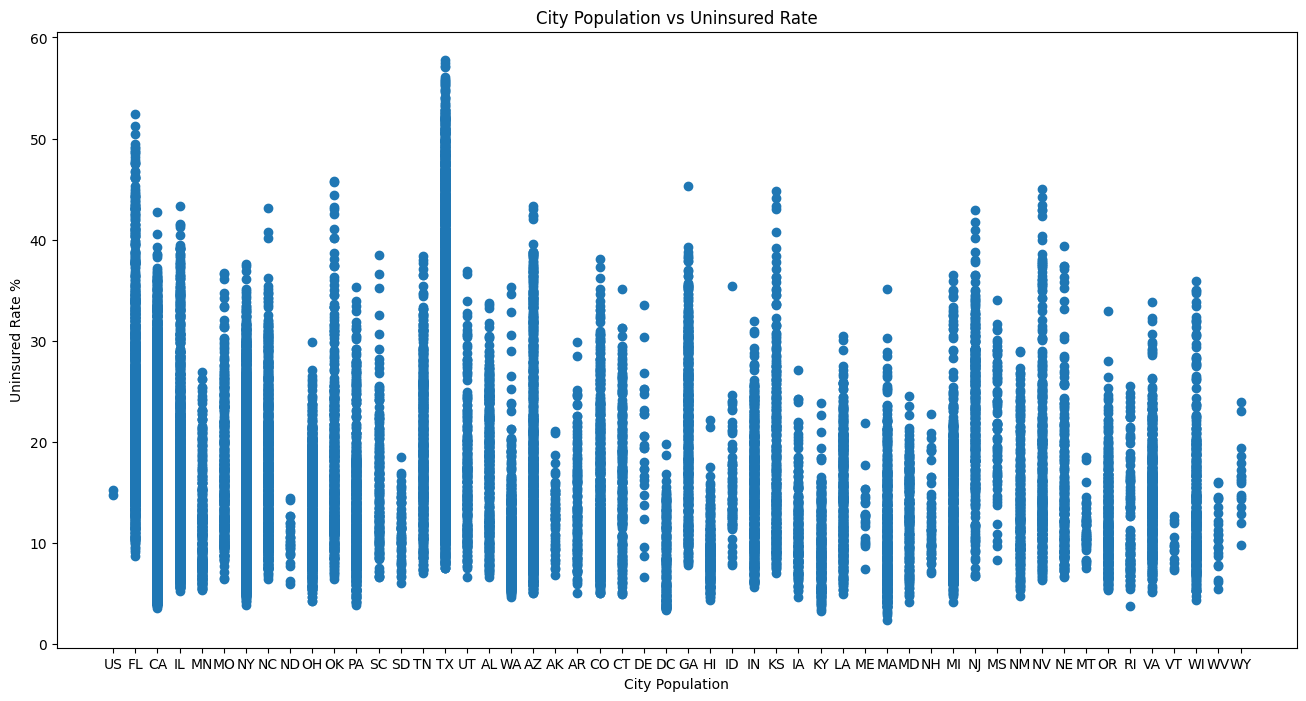

In [47]:
# Visualize uninsured rate differences by City
plt.figure(figsize=(16, 8))
plt.scatter(df.StateAbbr, df.Data_Value)
plt.xlabel('City Population')
plt.ylabel('Uninsured Rate %')
plt.title('City Population vs Uninsured Rate')
plt.show()

**Visualized relationship between city population and uninsured rate:**
Scatter plot with state on x-axis and uninsured rate on y-axis by usng this plot we can findout the cities with most uninsured rate and target that cities to expand insurance company.

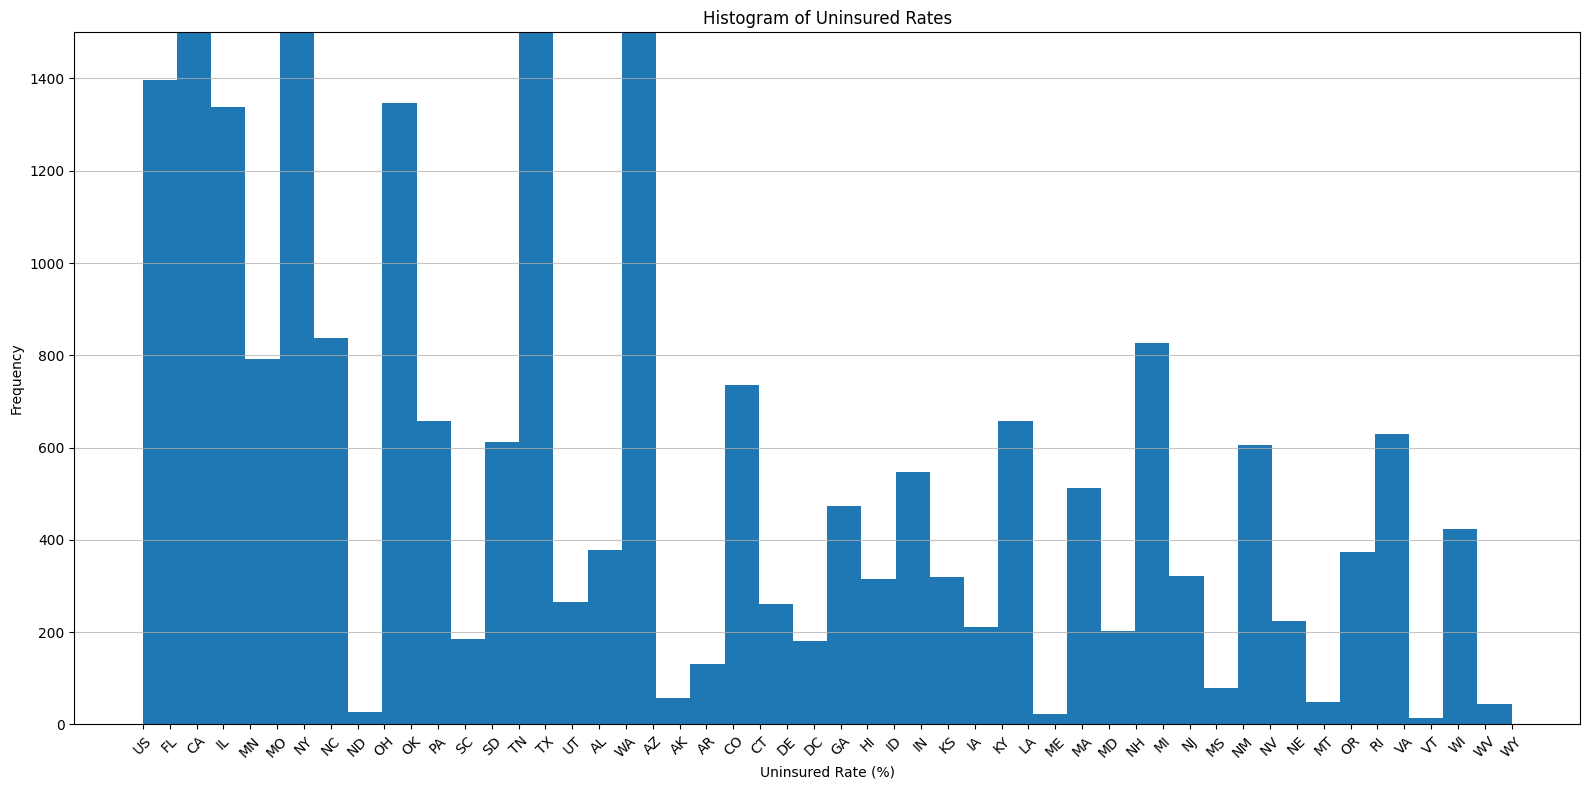

In [53]:
# Filter to uninsured rate column
uninsured_rates = df['StateAbbr']

# Create histogram
plt.figure(figsize=(16, 8))
plt.hist(uninsured_rates, bins=40)

# Add labels and title
plt.xlabel('Uninsured Rate (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Uninsured Rates')

# Customize plot aesthetics
plt.grid(axis='y', alpha=0.75)
plt.ylim(0, 1500)
plt.xticks(rotation=45)

# Display plot
plt.tight_layout()
plt.show()

**Created histogram of uninsured rates:**
Filtered  just the uninsured rate column and
plotted histogram distribution by
customizing plot labels, bins, axes limits.



---



## Submitting Your Work

Submit your work as usual.